## 1) Import Libraries

In [ ]:
import numpy as np
import nltk
nltk.download('stopwords')
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

from nltk.corpus import stopwords
STOPWORDS = set(stopwords.words('english'))

from tensorflow import keras
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

## 2) Set Model Hyperparameters

In [2]:
#Hyperparameters
vocab_size = 2000
embedding_dim = 64
max_length = 500
trunc_type = 'post'
padding_type = 'post'
oov_tok = '<OOV>'
training_portion = .8

## 3) Load Real Dataset

In [5]:
# Adding Dataset into articles and labels list
articles = []
labels = []
with open('/content/20ng-train-stemmed.txt') as file:
  docs = file.readlines()
  for line in docs:
    labels.append(line.split('\t')[0])
    article = line.split('\t')[1]
    for word in STOPWORDS:
      token = ' ' + word + ' '
      article = article.replace(token, ' ')
      article = article.replace(' ', ' ')
    articles.append(article)

In [6]:
# Clean Label Names
labels_new = []
for i in labels:
  i = i.replace('.', '')
  i = i.replace('-', '')
  labels_new.append(i)

## 4) Split data into 70% training and 30% validation datasets

In [7]:
train_articles, validation_articles, train_labels, validation_labels = train_test_split(articles, labels_new, test_size=0.3, stratify=labels_new)

In [8]:
print(len(train_articles))
print(len(train_labels))
print(len(validation_articles))
print(len(validation_labels))

7905
7905
3388
3388


In [9]:
# Check distribution of training dataset
pd.Series(train_labels).value_counts()

recsporthockey          420
recmotorcycles          419
socreligionchristian    419
recsportbaseball        418
scicrypt                416
scimed                  416
recautos                416
compwindowsx            415
scispace                415
scielectronics          414
compsysibmpchardware    413
miscforsale             409
compgraphics            409
compsysmachardware      405
composmswindowsmisc     400
talkpoliticsmideast     395
talkpoliticsguns        381
altatheism              336
talkpoliticsmisc        325
talkreligionmisc        264
dtype: int64

In [10]:
 # Check distribution of validation dataset
 pd.Series(validation_labels).value_counts()

recsporthockey          180
scicrypt                179
socreligionchristian    179
recsportbaseball        179
recmotorcycles          179
scimed                  178
scispace                178
recautos                178
compwindowsx            178
compsysibmpchardware    177
scielectronics          177
miscforsale             176
compgraphics            175
compsysmachardware      173
composmswindowsmisc     172
talkpoliticsmideast     169
talkpoliticsguns        164
altatheism              144
talkpoliticsmisc        140
talkreligionmisc        113
dtype: int64

## 5a) Tokenization and Vectorization - Articles

In [11]:
# Tokenize articles for training datasets
tokenizer = Tokenizer(num_words = vocab_size, oov_token=oov_tok)
tokenizer.fit_on_texts(train_articles)
train_sequences = tokenizer.texts_to_sequences(train_articles)
validation_sequences = tokenizer.texts_to_sequences(validation_articles)

print(train_sequences[10])
print(validation_sequences[10])

[5, 1, 1, 154, 1, 3, 1, 1, 154, 1, 3, 1, 1, 1, 4, 5, 1, 1, 1, 1396, 1, 48, 1, 4, 5, 1, 1, 1, 500, 793, 3, 1, 1448, 1, 793, 3, 216, 191, 17, 874, 1, 720, 30, 1023, 310, 1, 1023, 1, 1, 310, 1, 170, 310, 166, 357, 420, 577, 846, 152, 1, 131, 1856, 1289, 131, 1787, 310, 669, 48, 1, 1, 1, 1396, 1, 128, 1023, 1, 720, 782, 652, 176, 8, 1, 310, 720, 30, 176, 8, 1, 294, 1, 1, 222, 30, 1, 782, 1803, 436, 176, 70, 648, 199, 1788, 1, 1, 971, 1, 222, 29, 22, 36, 1, 22, 148, 1, 12, 44, 30, 318, 534, 183, 146, 840, 1, 222, 30, 689, 59, 628, 689, 30, 1803, 558, 121, 1, 451, 1, 1, 1, 1418, 30, 222, 44, 782, 1404, 835, 166, 22, 148, 1, 310, 30, 1, 782, 176, 8, 70, 648, 199, 1788, 1, 269, 697, 310, 1, 159, 166, 1217, 1267, 1, 971, 1101, 294, 29, 148, 1, 299, 12, 1023, 30, 1, 176, 8, 70, 648, 199, 1788, 1570, 1139, 37, 1, 1217, 1, 1, 971, 378, 253, 135, 534, 683, 1490, 30, 761, 29, 148, 152, 1, 720, 30, 748, 310, 30, 222, 1, 30, 310, 30, 971, 310, 277, 222, 1, 170, 336, 899, 294, 30, 310, 1, 1, 274, 222, 

In [12]:
# Padding to the end of the training and validation articles
train_padded = pad_sequences(train_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)
validation_padded = pad_sequences(validation_sequences, maxlen=max_length, padding=padding_type, truncating=trunc_type)

print(len(train_sequences[0]))
print(len(train_padded[0]))

print(len(train_sequences[1]))
print(len(train_padded[1]))

print(len(train_sequences[10]))
print(len(train_padded[10]))

print(len(validation_sequences[10]))
print(len(validation_padded[10]))

365
500
1033
500
297
500
67
500


## 5b) Tokenization and Vectorization - Labels

In [14]:
label_tokenizer = Tokenizer()
label_tokenizer.fit_on_texts(labels_new)
training_label_seq = np.asarray(label_tokenizer.texts_to_sequences(train_labels))
validation_label_seq = np.asarray(label_tokenizer.texts_to_sequences(validation_labels))
print(training_label_seq[0])
print(training_label_seq[1])
print(training_label_seq[2])
print(training_label_seq.shape)

print(validation_label_seq[0])
print(validation_label_seq[1])
print(validation_label_seq[2])
print(validation_label_seq.shape)

[1]
[18]
[15]
(7905, 1)
[15]
[1]
[11]
(3388, 1)


## 6) Model Building

In [15]:
model = tf.keras.Sequential([
    # Add an Embedding layer expecting input vocab of size 2000, and output embedding dimension of size 64
    tf.keras.layers.Embedding(vocab_size, embedding_dim),
    tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(embedding_dim)),
    tf.keras.layers.Dense(embedding_dim, activation='relu'),
    tf.keras.layers.Dense(32, activation='softmax')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, None, 64)          128000    
                                                                 
 bidirectional (Bidirectiona  (None, 128)              66048     
 l)                                                              
                                                                 
 dense (Dense)               (None, 64)                8256      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
Total params: 204,384
Trainable params: 204,384
Non-trainable params: 0
_________________________________________________________________


In [16]:
[print(i.shape, i.dtype) for i in model.inputs]
[print(o.shape, o.dtype) for o in model.outputs]
[print(l.name, l.input_shape, l.dtype) for l in model.layers]

(None, None) <dtype: 'float32'>
(None, 32) <dtype: 'float32'>
embedding (None, None) float32
bidirectional (None, None, 64) float32
dense (None, 128) float32
dense_1 (None, 64) float32


[None, None, None, None]

In [17]:
# Check dataset before model fitting
print(train_padded.shape)
print(training_label_seq.shape)
print(validation_padded.shape)
print(validation_label_seq.shape)

(7905, 500)
(7905, 1)
(3388, 500)
(3388, 1)


In [18]:
# Check dataset before model fitting
print(type(train_padded))
print(type(training_label_seq))
print(type(validation_padded))
print(type(validation_label_seq))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'numpy.ndarray'>


## 6) Model Validation

In [19]:
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
num_epochs = 10
history = model.fit(train_padded, training_label_seq, epochs=num_epochs, validation_data=(validation_padded, validation_label_seq), verbose=2)

Epoch 1/10
248/248 - 61s - loss: 2.7206 - accuracy: 0.1319 - val_loss: 2.1857 - val_accuracy: 0.2459 - 61s/epoch - 247ms/step
Epoch 2/10
248/248 - 53s - loss: 1.6414 - accuracy: 0.4568 - val_loss: 1.4192 - val_accuracy: 0.5425 - 53s/epoch - 214ms/step
Epoch 3/10
248/248 - 53s - loss: 1.0116 - accuracy: 0.6674 - val_loss: 1.0900 - val_accuracy: 0.6547 - 53s/epoch - 214ms/step
Epoch 4/10
248/248 - 53s - loss: 0.7992 - accuracy: 0.7490 - val_loss: 1.0305 - val_accuracy: 0.6821 - 53s/epoch - 213ms/step
Epoch 5/10
248/248 - 53s - loss: 0.5656 - accuracy: 0.8240 - val_loss: 0.9133 - val_accuracy: 0.7305 - 53s/epoch - 214ms/step
Epoch 6/10
248/248 - 53s - loss: 0.4502 - accuracy: 0.8615 - val_loss: 0.9971 - val_accuracy: 0.7231 - 53s/epoch - 213ms/step
Epoch 7/10
248/248 - 53s - loss: 0.4102 - accuracy: 0.8783 - val_loss: 0.9662 - val_accuracy: 0.7447 - 53s/epoch - 214ms/step
Epoch 8/10
248/248 - 53s - loss: 0.3502 - accuracy: 0.8944 - val_loss: 0.9435 - val_accuracy: 0.7571 - 53s/epoch - 213

## 7) Model Evaluation

In [23]:
score = model.evaluate(validation_padded, validation_label_seq, verbose=10)

print("Loss: %.3f \nAccuracy: %.3f" % (score[0], score[1]))

Loss: 1.046 
Accuracy: 0.762


In [25]:
from sklearn.metrics import classification_report

y_pred = model.predict(validation_padded, batch_size=64, verbose=10)
y_pred_bool = np.argmax(y_pred, axis=1)
print(classification_report(validation_label_seq.copy(), y_pred_bool.copy()))

              precision    recall  f1-score   support

           1       0.82      0.93      0.87       180
           2       0.87      0.76      0.81       179
           3       0.89      0.75      0.81       179
           4       0.76      0.84      0.80       179
           5       0.90      0.89      0.90       179
           6       0.72      0.74      0.73       178
           7       0.84      0.73      0.78       178
           8       0.76      0.76      0.76       178
           9       0.78      0.87      0.82       178
          10       0.68      0.72      0.70       177
          11       0.64      0.64      0.64       177
          12       0.70      0.74      0.72       176
          13       0.57      0.67      0.61       175
          14       0.82      0.66      0.73       173
          15       0.73      0.69      0.71       172
          16       0.86      0.87      0.87       169
          17       0.82      0.86      0.84       164
          18       0.79    

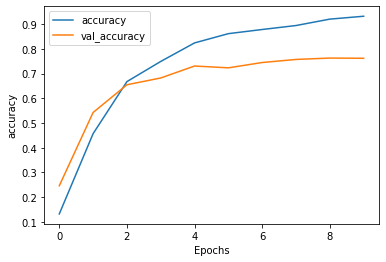

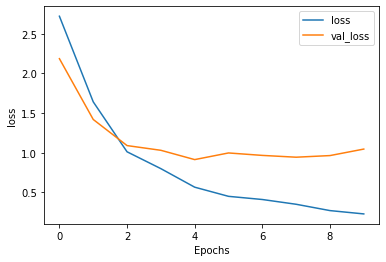

In [26]:
# Plot graphs for accuracy and loss
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()
  
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")